Original Data:
    Weight Texture   Label
0     150  smooth   Apple
1     170  smooth   Apple
2     140  smooth   Apple
3     130   rough  Orange
4     180   rough  Orange
5     160   rough  Orange
6     120  smooth   Apple
7     110   rough  Orange
8     190   rough  Orange
9     200  smooth   Apple

Preprocessed Data:
    Weight  Texture  Label
0     150        1      0
1     170        1      0
2     140        1      0
3     130        0      1
4     180        0      1
5     160        0      1
6     120        1      0
7     110        0      1
8     190        0      1
9     200        1      0

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00         1
      Orange       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



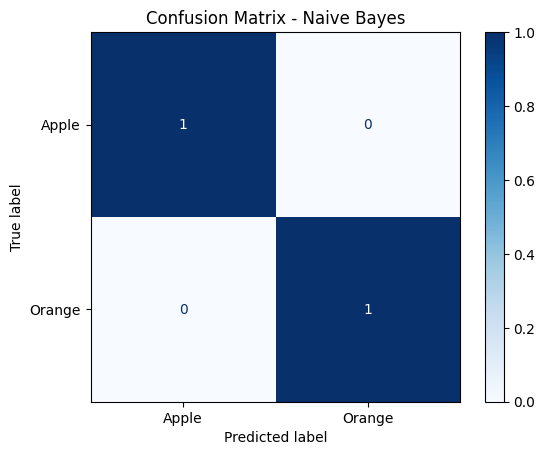


New Data Predictions: ['Orange' 'Apple']


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Create Dataset
data = {
    'Weight': [150, 170, 140, 130, 180, 160, 120, 110, 190, 200],
    'Texture': ['smooth', 'smooth', 'smooth', 'rough', 'rough', 'rough', 'smooth', 'rough', 'rough', 'smooth'],
    'Label': ['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple', 'Orange', 'Orange', 'Apple']
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# Step 2: Preprocessing
# Convert categorical 'Texture' and 'Label' to numeric
le_texture = LabelEncoder()
df['Texture'] = le_texture.fit_transform(df['Texture'])  # smooth = 1, rough = 0

le_label = LabelEncoder()
df['Label'] = le_label.fit_transform(df['Label'])  # Apple = 0, Orange = 1

print("\nPreprocessed Data:\n", df)

# Step 3: Train-Test Split
X = df[['Weight', 'Texture']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_label.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_label.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Step 6: Predict on New Data
# Example: weight = 155g, texture = 'rough'
new_data = pd.DataFrame({
    'Weight': [155, 125],
    'Texture': le_texture.transform(['rough', 'smooth'])  # Encode manually
})
new_pred = model.predict(new_data)
print("\nNew Data Predictions:", le_label.inverse_transform(new_pred))
